# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = {}


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities[city] = (lat_lng[0], lat_lng[1])

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:


# Set the API base URL

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?lat={cities[city][0]}&lon={cities[city][1]}&units=imperial&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the citie
    try:
        resp = requests.get(city_url)

        # Parse the JSON and retrieve data
        city_weather = resp.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord" ]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})
        print(city_country)

    # # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
City not found. Skipping...
Processing Record 2 of Set 1 | iwaki
JP
Processing Record 3 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 1 | jamestown
City not found. Skipping...
Processing Record 5 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 6 of Set 1 | norman wells
CA
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | victoria
SC
Processing Record 9 of Set 1 | mayo
CA
Processing Record 10 of Set 1 | fevralsk
City not found. Skipping...
Processing Record 11 of Set 1 | clyde river
CA
Processing Record 12 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 13 of Set 1 | along
CN
Processing Record 14 of Set 1 | walvis bay
City not found. Skipping...
Processing Record 15 of Set 1 | mahebourg
City not found. Skipping...
Processing Record 16 of Set 1 | ainazi
LV
Processing Re

In [13]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          322
Lat           322
Lng           322
Max Temp      322
Humidity      322
Cloudiness    322
Wind Speed    322
Country       322
Date          322
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iwaki,36.7448,141.8403,49.28,71,45,33.38,JP,1673283582
1,norman wells,72.1581,-126.6331,-4.11,98,100,1.32,CA,1673283585
2,victoria,-3.9074,55.7324,80.60,73,45,3.91,SC,1673283586
3,mayo,62.7862,-136.6742,-0.69,99,100,1.12,CA,1673283587
4,clyde river,70.1169,-81.1838,-27.94,99,75,5.64,CA,1673283588


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iwaki,36.7448,141.8403,49.28,71,45,33.38,JP,1673283582
1,norman wells,72.1581,-126.6331,-4.11,98,100,1.32,CA,1673283585
2,victoria,-3.9074,55.7324,80.60,73,45,3.91,SC,1673283586
3,mayo,62.7862,-136.6742,-0.69,99,100,1.12,CA,1673283587
4,clyde river,70.1169,-81.1838,-27.94,99,75,5.64,CA,1673283588


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

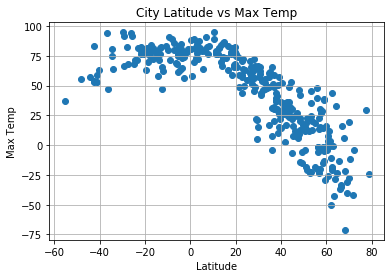

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('City Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

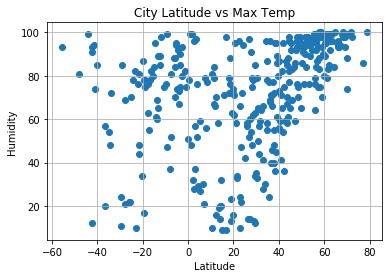

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('City Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

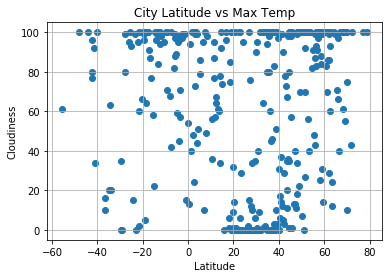

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

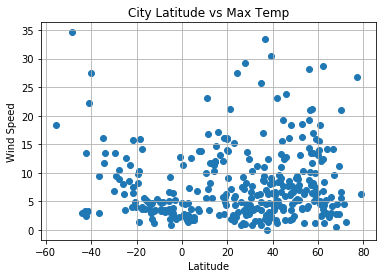

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
(temp_slope, temp_int, temp_r, temp_p, temp_std_err) = linregress(city_data_df['Lat'], city_data_df['Max Temp'])

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iwaki,36.7448,141.8403,49.28,71,45,33.38,JP,1673283582
1,norman wells,72.1581,-126.6331,-4.11,98,100,1.32,CA,1673283585
3,mayo,62.7862,-136.6742,-0.69,99,100,1.12,CA,1673283587
4,clyde river,70.1169,-81.1838,-27.94,99,75,5.64,CA,1673283588
5,along,29.5493,93.7856,5.58,85,6,2.71,CN,1673283589


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,victoria,-3.9074,55.7324,80.60,73,45,3.91,SC,1673283586
7,deniliquin,-34.3616,144.5196,74.86,48,63,11.72,AU,1673283593
12,envira,-7.3532,-69.6863,80.06,81,100,3.11,BR,1673283622
15,dodoma,-5.8832,35.7315,67.91,88,88,6.55,TZ,1673283635
16,ngukurr,-17.4146,133.4072,84.11,55,91,14.18,AU,1673283636


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8650004544794488


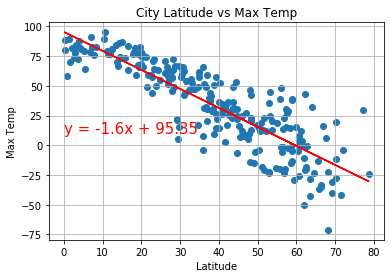

In [64]:
# Linear regression on Northern Hemisphere
(temp_slope, temp_int, temp_r, temp_p, temp_std_err) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
regress_values = northern_hemi_df['Lat'] * temp_slope + temp_int
line_eq = "y = " + str(round(temp_slope,2)) + "x + " + str(round(temp_int,2))


# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Incorporate the other graph properties
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title('City Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid()

# Save the figure
# plt.savefig("output_data/LinFig1.png")

# Show plot
print(f"The r-value is: {temp_r}")
plt.show()

The r-value is: 0.33149715433649096


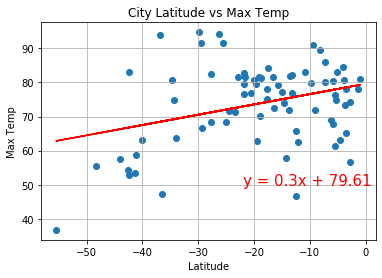

In [62]:
# Linear regression on Southern Hemisphere
(temp_slope, temp_int, temp_r, temp_p, temp_std_err) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
regress_values = southern_hemi_df['Lat'] * temp_slope + temp_int
line_eq = "y = " + str(round(temp_slope,2)) + "x + " + str(round(temp_int,2))


# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Incorporate the other graph properties
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-22,50),fontsize=15,color="red")
plt.title('City Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid()

# Save the figure
# plt.savefig("output_data/LinFig2.png")

# Show plot
print(f"The r-value is: {temp_r}")
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, there appears to be a relatively strong negative correlation between latitude and max temperature given an r value close to -1. In the Southern Hemisphere we see a relatively weak positive correlation between latitude and max temperature. This indicates that the farther North you go from the equator, the lower max temp you can expect. South of the equator we see that there is a weak positive correlation, indicating that max temps may be higher but we can't predict that with much confidence.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.583775168531631


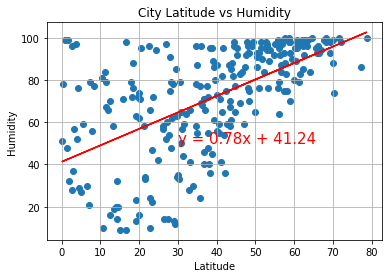

In [67]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
(hu_slope, hu_int, hu_r, hu_p, hu_std_err) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
regress_values = northern_hemi_df['Lat'] * hu_slope + hu_int
line_eq = "y = " + str(round(hu_slope,2)) + "x + " + str(round(hu_int,2))


# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(30,50),fontsize=15,color="red")
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

# Save the figure
# plt.savefig("output_data/LinFig3.png")

# Show plot
print(f"The r-value is: {hu_r}")
plt.show()

The r-value is: 0.21277402906551846


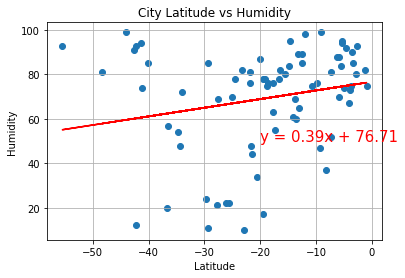

In [58]:
# Southern Hemisphere
(hu_slope, hu_int, hu_r, hu_p, hu_std_err) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
regress_values = southern_hemi_df['Lat'] * hu_slope + hu_int
line_eq = "y = " + str(round(hu_slope,2)) + "x + " + str(round(hu_int,2))


# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-20,50),fontsize=15,color="red")
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

# Save the figure
# plt.savefig("output_data/LinFig4.png")

# Show plot
print(f"The r-value is: {hu_r}")
plt.show()

**Discussion about the linear relationship:** North of the Equator there is a moderate positive correlation with Latitude and Humidity, indicating increasing humidity as one travels North. South of the equator there is a weak positive correlation as one heads southward but similarly to temperature, not a strong enough correlation coefficient to be indicative of any specific location's humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.21277402906551846


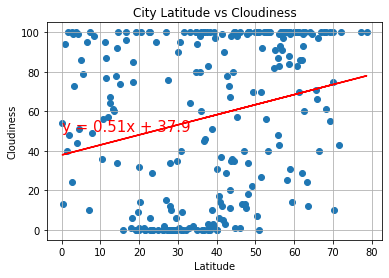

In [36]:
# Northern Hemisphere
(cl_slope, cl_int, cl_r, cl_p, cl_std_err) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
regress_values = northern_hemi_df['Lat'] * cl_slope + cl_int
line_eq = "y = " + str(round(cl_slope,2)) + "x + " + str(round(cl_int,2))


# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

# Save the figure
# plt.savefig("output_data/LinFig3.png")

# Show plot
print(f"The r-value is: {cl_r}")
plt.show()

The r-value is: 0.2267647647879862


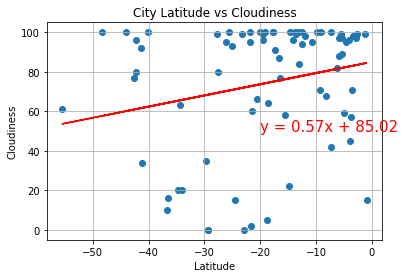

In [57]:
# Southern Hemisphere
(cl_slope, cl_int, cl_r, cl_p, cl_std_err) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
regress_values = southern_hemi_df['Lat'] * cl_slope + cl_int
line_eq = "y = " + str(round(cl_slope,2)) + "x + " + str(round(cl_int,2))


# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-20,50),fontsize=15,color="red")
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

# Save the figure
# plt.savefig("output_data/LinFig3.png")

# Show plot
print(f"The r-value is: {cl_r}")
plt.show()

**Discussion about the linear relationship:** Neither the Northern or Southern Hemispheres show strong correlations with Latitude and Cloudiness. In the Northern Hemisphere specifically, there is a high degree of variance in Cloudiness at the same latitude, with some cities being quite cloudy and others being quite sunny.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08834338950235099


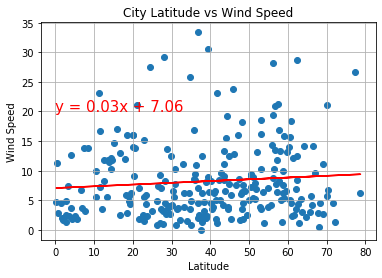

In [48]:
# Northern Hemisphere
(ws_slope, ws_int, ws_r, ws_p, ws_std_err) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
regress_values = northern_hemi_df['Lat'] * ws_slope + ws_int
line_eq = "y = " + str(round(ws_slope,2)) + "x + " + str(round(ws_int,2))


# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

# Save the figure
# plt.savefig("output_data/LinFig3.png")

# Show plot
print(f"The r-value is: {ws_r}")
plt.show()

The r-value is: -0.5601750680595324


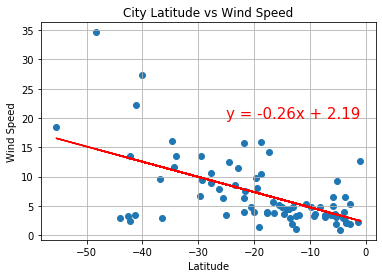

In [56]:
# Southern Hemisphere
(ws_slope, ws_int, ws_r, ws_p, ws_std_err) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
regress_values = southern_hemi_df['Lat'] * ws_slope + ws_int
line_eq = "y = " + str(round(ws_slope,2)) + "x + " + str(round(ws_int,2))


# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

# Save the figure
# plt.savefig("output_data/LinFig3.png")

# Show plot
print(f"The r-value is: {ws_r}")
plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere shows relatively no correlation between Lat and Wind Speed. The Southern Hemisphere on the other hand shows a moderate negative correlation, indicating that as one travels south from the Equator one can expect windier conditions.